<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/tibame_chatgpt%E5%8D%94%E4%BD%9C%E9%87%91%E8%9E%8D%E5%B8%82%E5%A0%B4%E6%BC%B2%E8%B7%8C%E9%A0%90%E6%B8%ACtelegrambot%E5%B0%88%E6%A1%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#pip install yfinance
#!pip install finta
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

# 載入資料

In [9]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import seaborn as sns
yf.pdr_override()
y_symbols = ["^TWII"]
from datetime import datetime
startdate = datetime(2010,12,1)
enddate = datetime(2022,12,30)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
print(df.shape)
display(df.head(3))
display(df.tail(3))

[*********************100%***********************]  1 of 1 completed
(2956, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-01,8430.599609,8520.110352,8428.639648,8520.110352,8520.078125,4202800
2010-12-02,8598.009766,8641.129883,8572.650391,8585.769531,8585.737305,4731800
2010-12-03,8630.879883,8659.620117,8618.259766,8624.009766,8623.977539,3710800


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-27,14310.190430,14410.240234,14310.190430,14328.429688,14328.429688,1821100
2022-12-28,14249.830078,14249.830078,14119.299805,14173.099609,14173.099609,1958900
2022-12-29,14097.509766,14120.570312,13981.629883,14085.019531,14085.019531,1839200


# Label triple_barrier

https://sharegpt.com/c/qqTJZKo

In [10]:
import numpy as np
import math
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

def triple_barrier_signal(price, ub, lb, t):
  '''
  triple-barrier包含2个horizontal barrier，1个vertical barrier。首先解释一下这3个barrier：
  根據3個barrier中第一個被touch的進行label
  barrier 1 (the upper barrier)首先達到，label 1
  barrier 2（the lower barrier)首先達到，label -1
  如果barrier 1和barrier 2都没有達到，则barrier 3達到，label 0
  '''
  signal = []
  for i in range(len(price) - t):
      # 情況1.如果price[i:i+t]這段序列有任何元素的值大於price[i]*ub則signal[i] = 1
      if max(price[i:i+t]) > price[i] * ub:
          signal.append(1)
      # 情況2.如果price[i:i+t]這段序列有任何元素的值低於price[i]*lb則signal[i] = -1
      elif min(price[i:i+t]) < price[i] * lb:
          signal.append(-1)
      # 如果以上情況1和情況2都沒有發生則signal[i] = 0
      else:
          signal.append(0)
  return signal
ret = triple_barrier_signal(df.Close.values.tolist(), 1.03, 0.97, 20)
#ret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']
df = df.head(len(ret))
df['triple_barrier_signal'] = ret

<ipython-input-10-d8cf0fcbfa2c>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['triple_barrier_signal'] = ret


In [11]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal
Date,,,,,,,
2022-11-04,12941.780273,13029.940430,12868.250000,13026.709961,13026.709961,2354400,1
2022-11-07,13109.349609,13246.589844,13103.349609,13223.730469,13223.730469,2750000,1
2022-11-08,13274.910156,13389.250000,13274.910156,13347.759766,13347.759766,3009500,1
2022-11-09,13410.190430,13638.809570,13410.190430,13638.809570,13638.809570,2981300,1
2022-11-10,13556.509766,13559.400391,13463.849609,13503.759766,13503.759766,2335900,1
2022-11-11,13878.950195,14045.509766,13878.950195,14007.559570,14007.559570,3988800,1
2022-11-14,14080.910156,14217.299805,14076.940430,14174.900391,14174.900391,3396800,1
2022-11-15,14325.490234,14568.509766,14278.530273,14546.309570,14546.309570,3441500,1
2022-11-16,14637.849609,14657.660156,14481.059570,14537.349609,14537.349609,3356100,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='triple_barrier_signal', ylabel='count'>

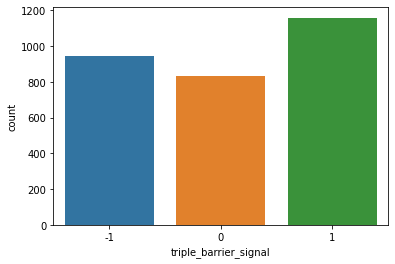

In [12]:
df['triple_barrier_signal'].value_counts()
sns.countplot(df['triple_barrier_signal'])

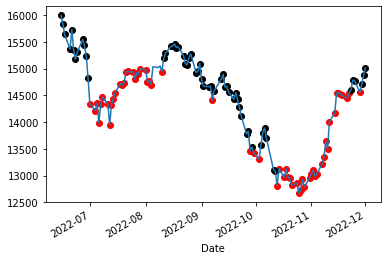

In [20]:
import matplotlib.pyplot as plt
df_recent = df.tail(120)
buy = df_recent[df_recent['triple_barrier_signal']==1]['Close']
sell = df_recent[df_recent['triple_barrier_signal']==-1]['Close']
df_recent['Close'].plot()
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
plt.show()

# 建立ohlcv

In [14]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

ModuleNotFoundError: ignored

# 計算技術指標RSI

In [ ]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

In [ ]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

In [ ]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

In [ ]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

In [ ]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

In [ ]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

In [ ]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

In [ ]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

In [ ]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

In [ ]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

In [ ]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

In [ ]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

In [ ]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

In [ ]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

In [ ]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [ ]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = df.columns[-15:].tolist() #取15個剛剛建立的技術指標當特徵
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

# 相關性分析

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(abs(df.corr()),annot=True,linewidths=0.1)

# features scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)#縮放到0-1之間
df_minmax = pd.DataFrame(df_minmax,index = df.index,columns = df.columns)#轉回dataframe格式
df_minmax[y_name] = df[y_name]#y不用MinMaxScaler
df_minmax.tail()

In [ ]:
df = df_minmax
print('特徵縮放完成!')

# Xs ,ys prepare

In [ ]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

# check

In [ ]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

# Reshape X

(圖片數量,長,寬,1張)

In [ ]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

# One hot encoding of label

原始y代表漲幅

In [ ]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

# Visualization

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and test sets

In [ ]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

# 調整採樣

In [ ]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

# Split training and val sets

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [ ]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

In [ ]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

In [ ]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

In [ ]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

# CNN

In [ ]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [ ]:
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [ ]:
#1
lr_reduction = ReduceLROnPlateau(
    monitor = 'val_acc', 
    factor=0.5, 
    patience = 3, 
    verbose = 1, 
    min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_acc',#驗證集acc
                   min_delta=0, 
                   patience=50,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [ ]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 500,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

# 訓練過程評估

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [ ]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

真實y值

In [ ]:
print(yval[:5])

# 分類報告

In [ ]:
def 勝率(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
勝率(yval,y_pred)

In [ ]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

# plot error

In [ ]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 預測最後40筆

In [ ]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

# 0~20筆

In [ ]:
INDEX60 = df[-60:].index
#C = web.DataReader(SID,'yahoo',start="2000-01-01")[['Close']]
C = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)[['Close']]
C = C.loc[INDEX60,:]
C['SIGNAL'] = [np.nan for _ in range(20)] + answer #20個NAN+預測答案
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'][20:40].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 20~40筆

In [ ]:
C['Close'][40:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 合併

In [ ]:
C['Close'][20:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 平滑版本

In [ ]:
C_roll20 = pd.DataFrame(index=C.index)#空的dataframe index = 倒數60天股票日期
C_roll20['Close'] = C['Close'].rolling(20).mean()#收盤價做20天平滑
C_roll20['SIGNAL'] = C['SIGNAL']
buy = C_roll20[C_roll20['SIGNAL']==1]['Close']#買點
sell= C_roll20[C_roll20['SIGNAL']==2]['Close']#賣點
C_roll20['Close'][20:].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

In [ ]:
C = C.dropna(axis=0)
C

In [ ]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(5)

In [ ]:
def 勝率(df):
  t = []
  for i,idx in enumerate(df.index):
    訊號 = np.argmax(df.iloc[i,-3:])
    if 訊號 == 1:#buy
      try:
        點差 = df.iloc[i+1,0] - df.iloc[i,0]
        if 點差>0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 2:#sell
      try:
        點差 = df.iloc[i,0] - df.iloc[i+1,0]
        if 點差<0:
          t.append(True)
        else:
          t.append(False)
      except:
        pass
    if 訊號 == 0:#hold
      pass
  return np.mean(t)
#C['Close'].shift()-C['Close'],len(C['Close'].shift()-C['Close'])
勝率(df)

In [ ]:
t = []
for i in range(len(C)):
  signal = np.argmax(C.iloc[i,-3:])
  if signal == 2:
    signal = -1
    t.append(signal)
  if signal == 1:
    signal = 1
    t.append(signal)
  if signal == 0:
    t.append(signal)
t,len(t)

In [ ]:
a = (C['Close'].shift()-C['Close']).values*t
平均獲利 = pd.Series((a>0)*a).dropna().mean()
平均損失 = pd.Series((a<0)*a).dropna().mean()
賠率 = 1-勝率(df)
print(勝率(df),平均獲利,賠率,平均損失)
分子 = 勝率(df)*平均獲利
分母 =  賠率*平均損失*-1
print(分子,分母)
盈虧比 = (分子)/(分母)
盈虧比

In [ ]:
賠率

# save model

In [ ]:
model.save('Rikcy_net.h5')
del model

In [ ]:
from keras.models import load_model
model = load_model('Rikcy_net.h5')
predict = model.predict(X_test)

In [ ]:
predict[-5:]